In [1]:
from __future__ import print_function
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#准备数据
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter=iter(trainloader)
images,labels=dataiter.next()

In [5]:
labels

tensor([9, 0, 6, 8])

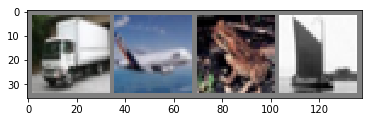

truck plane  frog  ship


In [6]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [7]:
#构造网络
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()

In [9]:
import torch.optim as optim

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [11]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [13]:
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.cpu().item()
        if i%2000==1999:
            print('[%d,%5s] loss: %.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss=0.0
print('训练完成')

[1, 2000] loss: 2.229
[1, 4000] loss: 1.848
[1, 6000] loss: 1.639
[1, 8000] loss: 1.564
[1,10000] loss: 1.538
[1,12000] loss: 1.479
[2, 2000] loss: 1.412
[2, 4000] loss: 1.381
[2, 6000] loss: 1.326
[2, 8000] loss: 1.331
[2,10000] loss: 1.306
[2,12000] loss: 1.264
训练完成


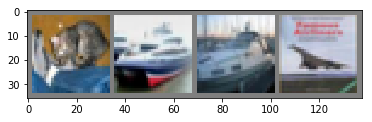

GroundTruth:    cat  ship  ship plane


In [46]:
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [22]:
outputs = net(images)

In [35]:
torch.cuda.device_count()

1

In [24]:
_,predicted = torch.max(outputs,1)

In [26]:
predicted

tensor([3, 8, 8, 8])

In [27]:
print('Predicted: ',' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [30]:
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs,1)
        c=(predicted==labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label]+=c[i].item()
            class_total[label]+=1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i],100*class_correct[i]/class_total[i]))

Accuracy of plane : 46 %
Accuracy of   car : 69 %
Accuracy of  bird : 31 %
Accuracy of   cat : 30 %
Accuracy of  deer : 58 %
Accuracy of   dog : 47 %
Accuracy of  frog : 69 %
Accuracy of horse : 64 %
Accuracy of  ship : 82 %
Accuracy of truck : 60 %
